**Proyecto Final Analitica de Negocios**

Integrantes:

Santiago Velilla Correa

Samuel Correa Florez

Pablo Posada

Para este proyecto usaremos una base de datos acerca de aprovacion de tarjeta de credito, la cual analizaremos con los modelos "Naive Bayes" y "Arboles de Decision".

Se cargan las Librerias

In [ ]:
import numpy as np #Funciones Matematicas
import pandas as pd #Comunicacion con excel
from sklearn.naive_bayes import GaussianNB #Modelo de Clasificacion
from sklearn.metrics import confusion_matrix #Metrica de evaluacion
import matplotlib.pyplot as plt #Graficador
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

Se carga la Base de Datos

In [ ]:
nxl='/content/clean_dataset.csv'
XDB=pd.read_csv(nxl) #Traer los datos
XDB.dropna() #Eliminar celdas vacias, datos faltantes

#Seleccionamos variables de interes
XDB=XDB[['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Employed', 'CreditScore', 'Income', 'Approved']]

#Datos de Entrada- np.array() - Convertir a numeros
XD=np.array(XDB[['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Employed', 'CreditScore', 'Income']])
#Datos de Salida - Valor deseado - Que aprenda el modelo
yd=np.array(XDB['Approved'])

XDB.head(100)

,Gender,Age,Debt,Married,BankCustomer,Employed,CreditScore,Income,Approved
0,1,30.83,0.000,1,1,1,1,0,1
1,0,58.67,4.460,1,1,1,6,560,1
2,0,24.50,0.500,1,1,0,0,824,1
3,1,27.83,1.540,1,1,1,5,3,1
4,1,20.17,5.625,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
95,0,28.58,3.540,1,1,0,0,0,0
96,1,23.00,0.625,0,0,0,0,1,0
97,1,28.46,0.500,1,1,0,0,0,0
98,0,22.50,11.000,0,0,0,0,0,0


Se identifica cual es la correlación

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Esta es la matriz de correlacion:
                 Gender       Age      Debt   Married  BankCustomer  Employed  \
Gender        1.000000  0.035044 -0.041746 -0.068062     -0.071250 -0.077784   
Age           0.035044  1.000000  0.202177  0.106929      0.099477  0.086037   
Debt         -0.041746  0.202177  1.000000  0.074649      0.083781  0.174846   
Married      -0.068062  0.106929  0.074649  1.000000      0.992033  0.175428   
BankCustomer -0.071250  0.099477  0.083781  0.992033      1.000000  0.170268   
Employed     -0.077784  0.086037  0.174846  0.175428      0.170268  1.000000   
CreditScore  -0.024630  0.187327  0.271207  0.113968      0.111077  0.571498   
Income       -0.002063  0.018719  0.123121 -0.006899      0.057273  0.077652   
Approved     -0.028934  0.164086  0.206294  0.180583      0.188964  0.458301   

              CreditScore    Income  Approved  
Gender          -0.024630 -0.002063 -0.028934  
Age              0.187327  0.018719  0.164086  
Debt             0.2

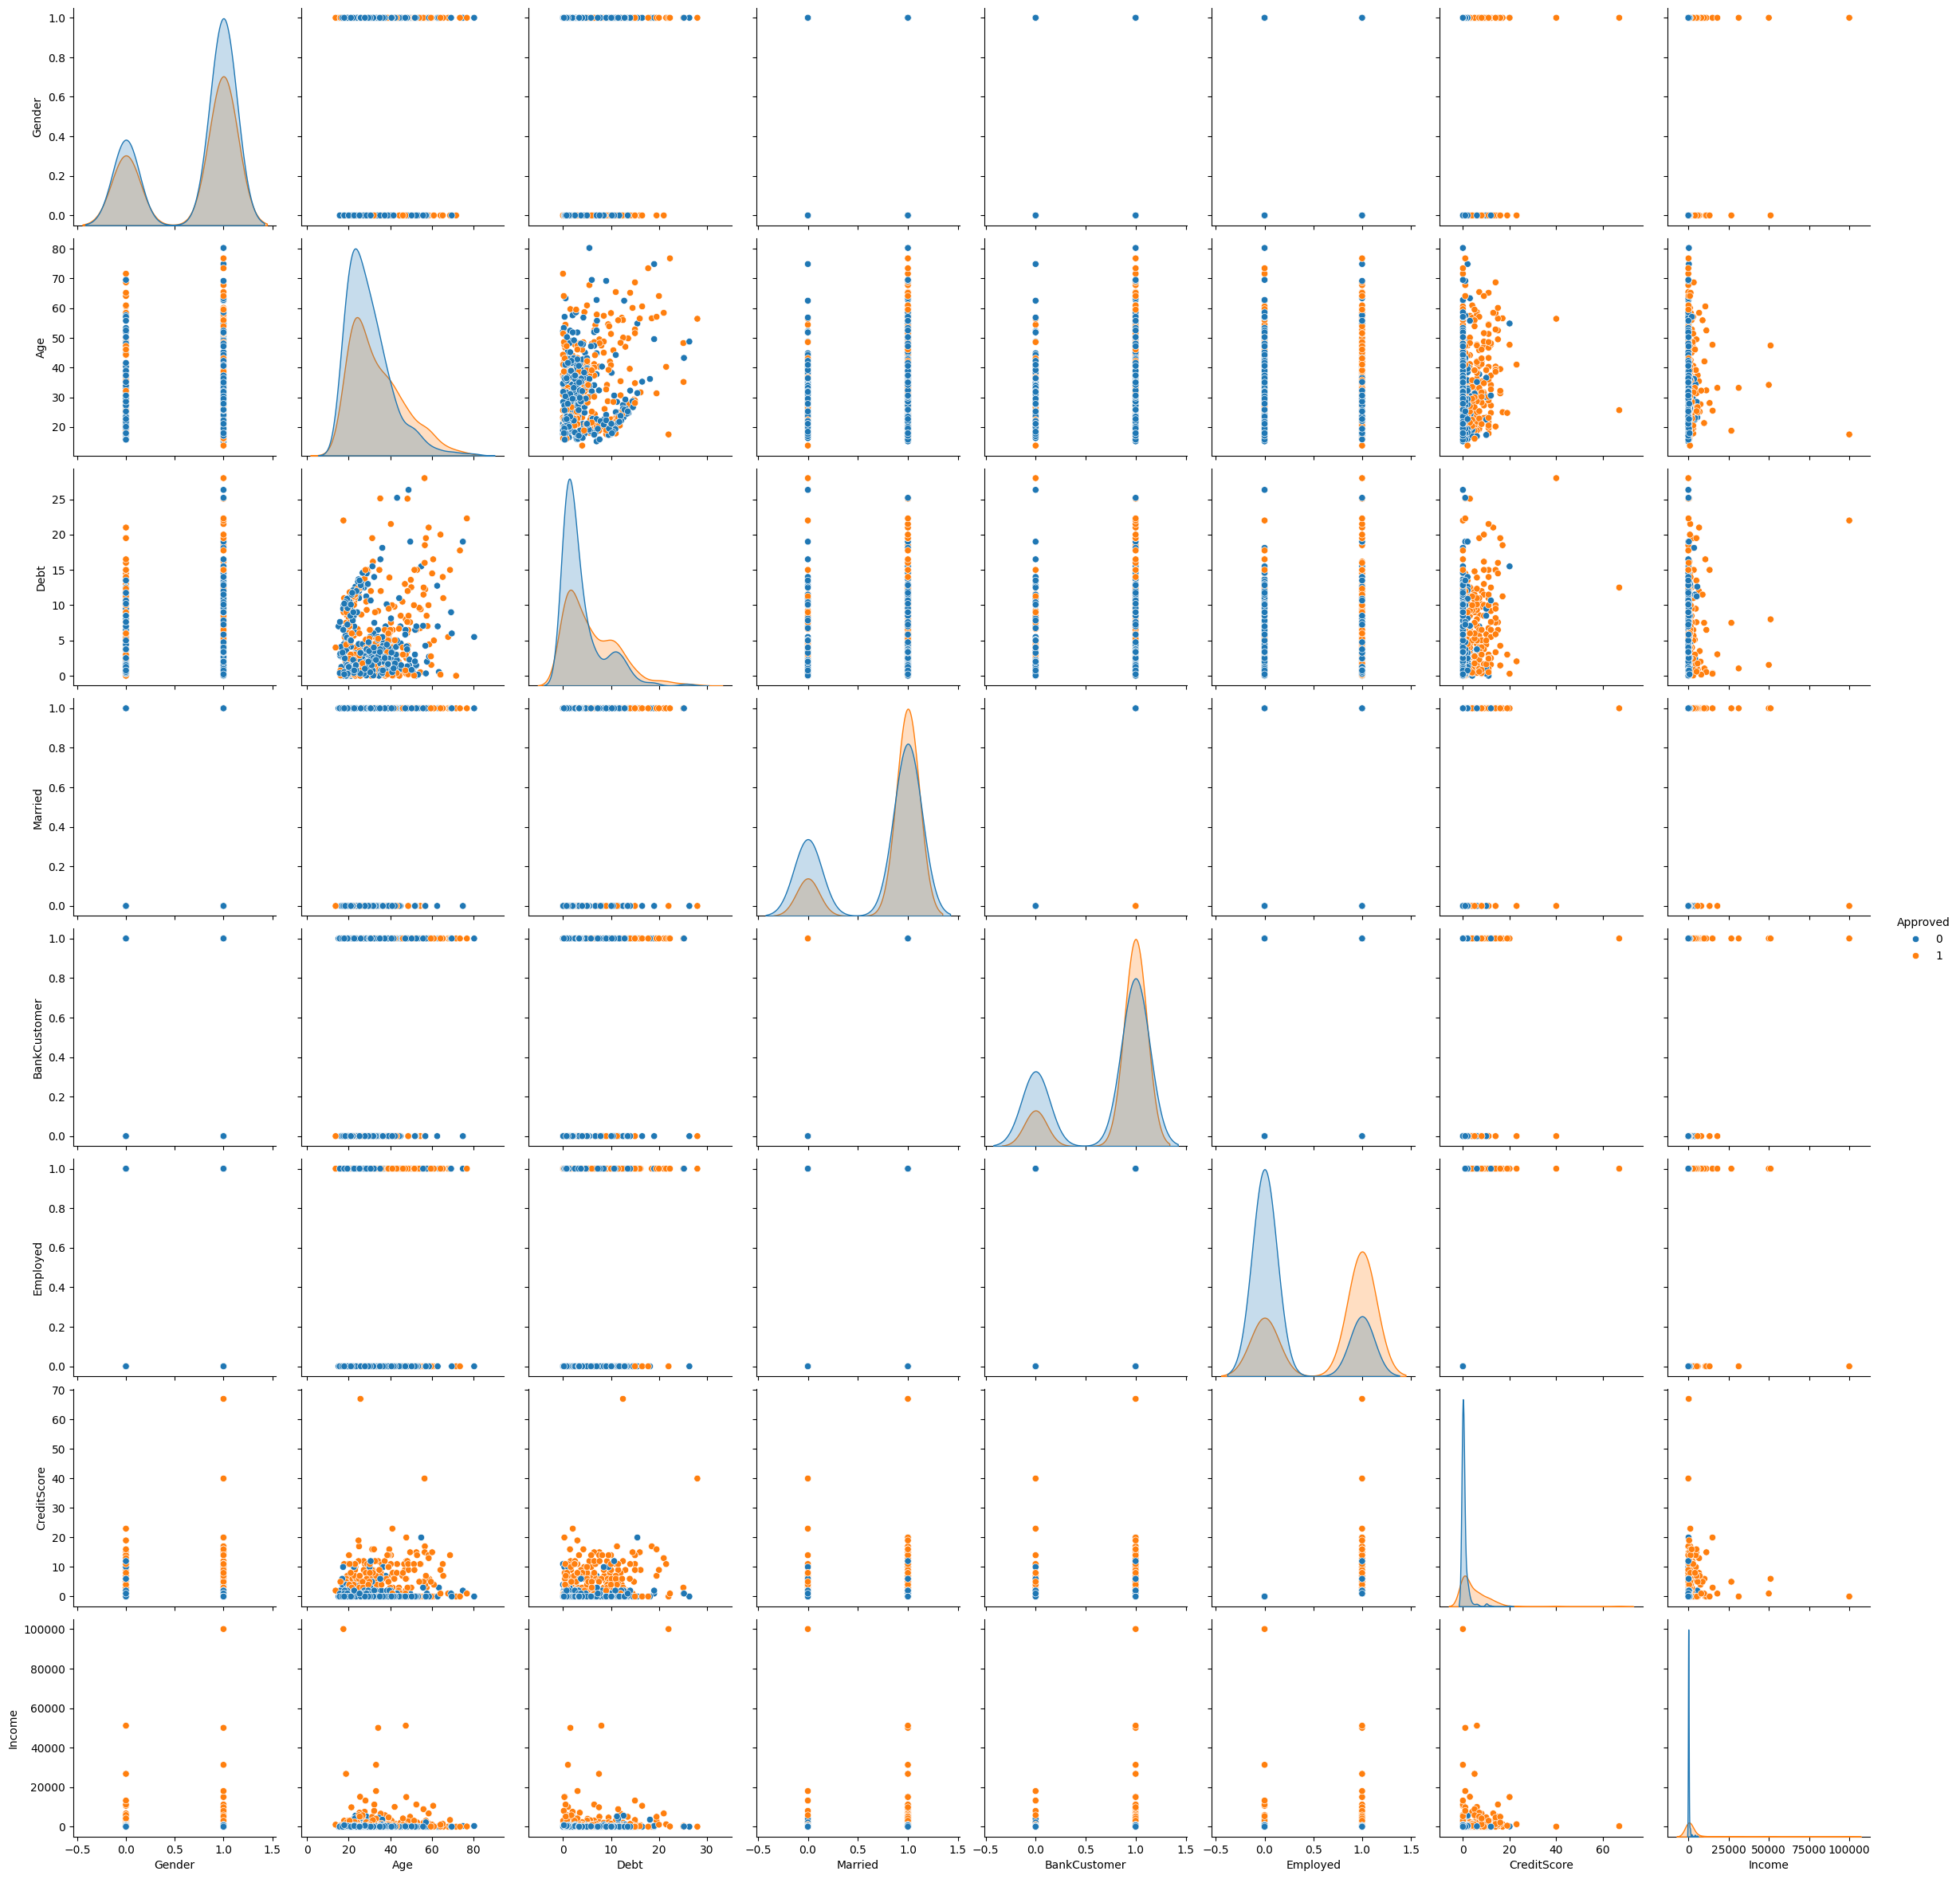

In [ ]:
sns.pairplot(XDB, hue='Approved', size=3,vars=['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Employed', 'CreditScore', 'Income'])

#Para confirmar la buena correlacion
corr = XDB.corr()
print("Esta es la matriz de correlacion:\n",corr)

#Se procede con la configuracion de los datos de entrada y salida
XDd=np.array(XDB.iloc[:,0:3])      #Toma las variables de entrada
ydd=np.array(XDB.iloc[:,3])        #Enroll


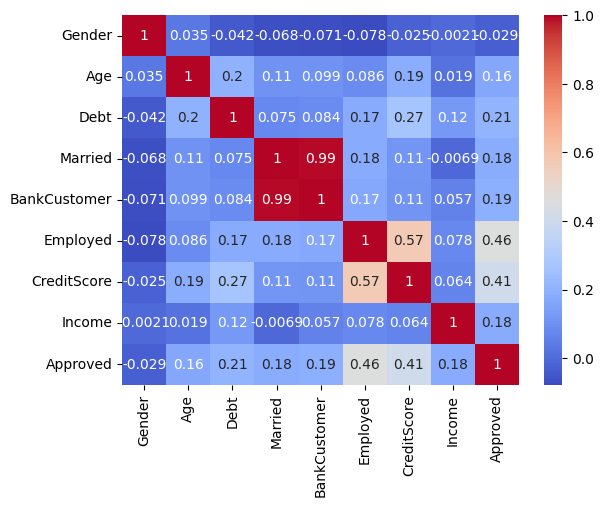

In [ ]:
#Grafico de la matriz de correlación entre las variables
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

**Modelo Naive Bayes**

0. Se implementa el modelo

In [ ]:
mnb=GaussianNB()
mnb.fit(XD,yd)
ydp=mnb.predict(XD)

#Parametros del modelo por categoria - Urbana o Rural
u=mnb.theta_
sigma=np.sqrt(mnb.var_)

#Metrica de evaluación - Como se comporto el modelo identificando Urbano o Rural
cm=confusion_matrix(yd,ydp)
print("La matriz de confusion es:")
print(cm)

La matriz de confusion es:
[[355  28]
 [152 155]]


3. Se procede con la evaluacion del modelo

In [ ]:
#Evaluación del modelo
VN=cm[0,0]; FP=cm[0,1]; FN=cm[1,0]; VP=cm[1,1]

Ex=(VN+VP)/(VN+VP+FN+FP)  #Que porcentaje de los datos pronostico correctamente
print("La exactitud alcanzada por el modelo es: ",Ex)

Se=VP/(FN+VP) #Como le fue con los positivos
print("La sensibilidad alcanzada por el modelo es: ",Se)

Es=VN/(VN+FP) #Como le fue con los negativos
print("La especificidad alcanzada por el modelo es: ",Es)



La exactitud alcanzada por el modelo es:  0.7391304347826086
La sensibilidad alcanzada por el modelo es:  0.504885993485342
La especificidad alcanzada por el modelo es:  0.9268929503916449


4. Analisis con una sola persona con datos especificos

In [ ]:
Xun=np.array([[1,21,4.4,0,1,1,6,600]]) #Persona especifica
ydun=mnb.predict(Xun)
print(ydun)

[1]


El personaje especifico que nos inventamos tiene unas caracteristicas especificas  y segun el modelo este personaje:  si le aprobarian una tarjeta de credito con el banco en cuestión, el perosnaje tiene como caracteristicas que es Hombre, tiene 21 años, un puntaje de deuda de 4.4, está soltero, tiene una cuenta con el banco en cuestion, tiene trabajo, un puntaje de crédito de 6 y unos ingresos iguales a 600, lo cual arrojo un resultado positivo para la aprobacion.

In [ ]:
# Calcular el total de aprobados
total_aprobados = XDB['Approved'].sum()

# Calcular el total de no aprobados
total_no_aprobados = len(XDB) - total_aprobados

# Calcular el porcentaje de aprobados
porcentaje_aprobados = (total_aprobados / len(XDB)) * 100

# Calcular el porcentaje de no aprobados
porcentaje_no_aprobados = (total_no_aprobados / len(XDB)) * 100

# Imprimir los resultados
print(f"El total de aprobados fue: {total_aprobados}")
print(f"El total de no aprobados fue: {total_no_aprobados}")
print(f"El porcentaje de aprobados es: {porcentaje_aprobados:.2f}%")
print(f"El porcentaje de no aprobados es: {porcentaje_no_aprobados:.2f}%")

El total de aprobados fue: 307
El total de no aprobados fue: 383
El porcentaje de aprobados es: 44.49%
El porcentaje de no aprobados es: 55.51%


Segun estos datos encontrados podemos ver que en la base de datos tenemos 690 personas diferentes de las cuales a 307 de ellas se les acepto la tareta de credito ofrecida y a 383 personas se les nego, lo cual arroja un procentaje de 44.49% para los aprobados y 55.51% para los no aprobados.

**Analisis de los datos**
En la base de datos hay muchas variables diferentes de las cuales solamente utilizamos 8 las cuales consideramos mas relevantes ademas de la variable de salida de si fue aprovado o no.
En la variable de salida cabe resaltar que 0 significa que no fue aprobado y 1 significa que si fue aprobado.
La cantidad de resultados se pdestaca que hay 690 datos diferentes. En cuanto a los porcentajes de los datos se descubrio que el 44.59% de los datos pertenece al grupo de los aprobados y el 55.51% pertenece a los no aprobados.
De manera general se puede observar que el modelo logro una exactitud que se ubico por encima del 73% aproximadamente, ademas alcanzo una sensibilidad del 50%, una especificidad del 92%. De manera general esta exactitud lo convierte en un modelo medianamente bueno pero que se debe analizar y usar con cuidado y usando mas herramientas para apoyarse ya que no alcanza unos niveles aceptables los cuales deberian ser mas altos en valores como la exactitud, pero igual se destaca que tiene un buen porcentaje el cual casi llega al 75% el cual es un nivel aceptable.



**Modelo del arbol de decisión**


1. Creación del Modelo del arbol de decisión y graficación

In [ ]:
mar=DecisionTreeClassifier(criterion='gini', max_depth=4) #4 variables de entrada
mar.fit(XD,yd)
ydp=mar.predict(XD)

cm2=confusion_matrix(yd,ydp)
print(cm2)

#Evaluación del modelo
VN2=cm2[0,0]; FP2=cm2[0,1]; FN2=cm2[1,0]; VP2=cm2[1,1]

Ex2=(VN2+VP2)/(VN2+VP2+FN2+FP2)  #Que porcentaje de los datos pronostico correctamente
print("La exactitud alcanzada por el modelo es: ",Ex2)

Se2=VP2/(FN2+VP2) #Como le fue con los positivos
print("La sensibilidad alcanzada por el modelo es: ",Se2)

Es2=VN2/(VN2+FP2) #Como le fue con los negativos
print("La especificidad alcanzada por el modelo es: ",Es2)

[[366  17]
 [119 188]]
La exactitud alcanzada por el modelo es:  0.8028985507246377
La sensibilidad alcanzada por el modelo es:  0.6123778501628665
La especificidad alcanzada por el modelo es:  0.9556135770234987


2. Graficamos el árbol

In [ ]:
#Librerias para gráficar el arbol
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

vs=['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Employed', 'CreditScore', 'Income'] #Títulos de los nodos del Arbol
dot_graph=export_graphviz(mar,feature_names=vs)
graph=graph_from_dot_data(dot_graph)
graph.write_png('arbolProyectoFinal.png')

True

3. Analisis con personaje especifico

In [ ]:
print(Xun)
#Pronosticos
ydp2=mar.predict(Xun)
print(ydp2)

XD2=np.array(XDB2[['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Employed', 'CreditScore', 'Income']]) #Datos de Entrada

#Pronosticamos la PreAprobación
ydp2=mar.predict(XD2)
print("El número de PreAprobados es:",np.sum(ydp2))
print("El número total de Datos es:",len(ydp2))
print("El número total de PreNegados es;",len(ydp2)-np.sum(ydp2))

[[  1.   21.    4.4   0.    1.    1.    6.  600. ]]
[1]
El número de PreAprobados es: 205
El número total de Datos es: 690
El número total de PreNegados es; 485


Segun este modelo el personaje especifico si es aceptado para tener la tarjeta de credito del banco en cuestion el cual tiene las caracteristicas analizadas en el modelo anterior.

**Análisis del modelo:** De acuerdo con la base de datos suministrada y el nodo del árbol de decisión se puede observar un total de 690 datos, divididos en 205 PreAprobados y un total de 485 PreNegados, esto representa el 30% y el 70% respectivamente. De acuerdo con el pronóstico realizado por el modelo, este alcanzó una exactitud cercana al 80% la cual se puede considerar que es un modelo con una tasa de exactitud alta. Por otro lado, la sensibilidad cercana al 61% y por último, se obtuvo una tasa de especificidad cercana al 92%

Se destacan los nodos puros, los cuales fueron 2 y su estructura es:

"[PreNeg:0,PreApr:1]". Se debe cumplir la regla de: CreditScore > 2.5, Debit <= 1.418 AND Age <= 16.5.

"[PreNeg:0,PreApr:17]". Se debe cumplir la regla de: CreditScore > 2.5, Debit <= 1.418, Age > 24.915
AND Income > 91.5



Con respecto al pronóstico de los datos, se puede observar un total de 690 individuos sin PreAprobación, de los cuales un total de 205 pueden ser PreAprobados y un total de 485 que pueden ser PreNegados.

**Conclusiones:**
Para la realización del trabajo, se usaron los dos modelos anteriormente mencionados los cuales dieron resultados favorables.

Con respecto a la exactitud de los modelos, el modelo de NB obtuvo una tasa de 73,9% y en el modelo del árbol de decisión obtuvo una tasa de 80%. Aunque el segundo modelo obtuvo una tasa mayor, no es tan lejana la diferencia. Se recomienda usar este segundo modelo ya que cuenta con una tasa mas favorable que el otro.

Con respecto a la sensibilidad alcanzada, el modelo de NB obtuvo una tasa de 50% y en el modelo del árbol de decisión obtuvo una tasa de 61%. Se recomienda usar este segundo modelo ya que cuenta con una tasa mas favorable que el otro.

COn respecto a la especificidad alcanzada, el modelo de NB obtuvo una tasa de 92.6% y en el modelo del árbol de decisión obtuvo una tasa de 95,5%, Se recomienda usar este segundo modelo ya que cuenta con una tasa mas favorable que el otro.

En términos generales, el modelo del árbol obtuvo mayor resultado en las variables, siendo mejor este para la toma de decisiones de una empresa.